In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.core.display import HTML

In [21]:
'''
mpl.rcParams['figure.facecolor'] = '0.065'
'''

# centering output plots
HTML("""
<style>
.jp-RenderedImage {
    display: table-cell;
    text-align: center;
    margin: auto;
}
.prompt 
    display:none;
}  
</style>
""")

In [22]:
data = pd.read_csv("data.csv")
enc_data = pd.read_csv("encoded_data.csv")

In [23]:
enc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   float64
 2   SeniorCitizen                            7043 non-null   float64
 3   Partner                                  7043 non-null   float64
 4   Dependents                               7043 non-null   float64
 5   tenure                                   7043 non-null   float64
 6   PhoneService                             7043 non-null   float64
 7   MultipleLines                            7043 non-null   float64
 8   OnlineSecurity                           7043 non-null   float64
 9   OnlineBackup                             7043 non-null   float64
 10  DeviceProtection                         7043 no

# EDA

Let's make a little (or not little :) research in our data. We have only 3 not-categorical features: tenure, MonthCharges and TotalCharges. All other feature were either categorical or binary and after encoding all of them become binary.

This file is going to be large. So here is the links on each step in it

<ol>
  <li><a href="#churn-distribution">Visualization of Churn distribution</a>
  <li><a href="#analysing-non-categorical-data">Analysing non-categorical data</a>
    <ul>
      <li><a href="#non-categorical-histograms">Histograms of MonthCharges, tenure and TotalCharges</a></li>
      <li><a href="#non-categorical-influence">Influence of Churn on tenure, MonthCharges and TotalCharges distribution</a></li>
      <li><a href="#total-charges-statistical-hypotesis">Statistical hypotesys about TotalCharges</a></li>
    </ul>
  </li>
</ol>

<a id="churn-distribution"></a>
## 1. Visualization of Churn distribution

Churn is our target variable. Understanding of how our classes are distributed is pretty important

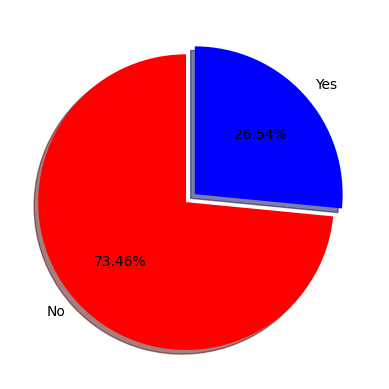

In [24]:
fig, ax = plt.subplots()
ax.pie(data["Churn"].value_counts(), labels=["No", "Yes"], autopct='%1.2f%%',
       colors=['red', 'blue'], shadow=True, explode=[0.08, 0.0], startangle=90)
plt.show()

We see pretty strong disbalance in our target classes. Perhaps in future we will need to do something with this. Some ML algorithms can be sensitive to such a problem

<a id="analysing-non-categorical-data"></a>
## 2. Analysing non-categorical data

<a id="non-categorical-histograms"><a>

## Histograms of MonthCharges, tenure and TotalCharges

Let's look at the histograms of our numerical features and think if they can tell us something.

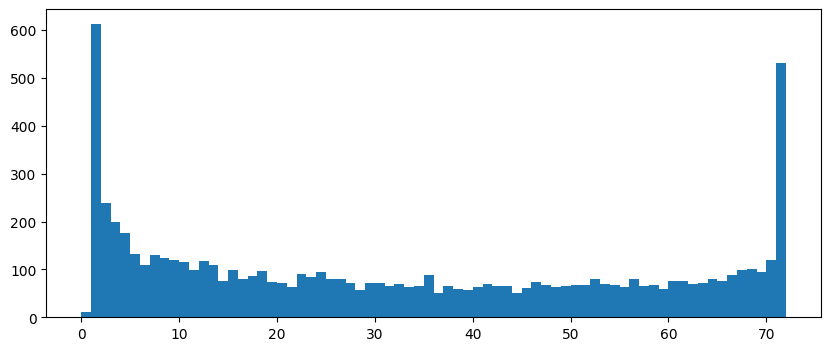

In [26]:
fig, ax = plt.subplots(figsize = (10,4))

ax.hist(data["tenure"], bins=72)
plt.show()

We see that the tenure feature is distributed nearly identically through the number of months from 0 to 72 except the "side values" which are closer to 72 and 0. There are many people in the data which are customers of the company only for 1 month and 72 month

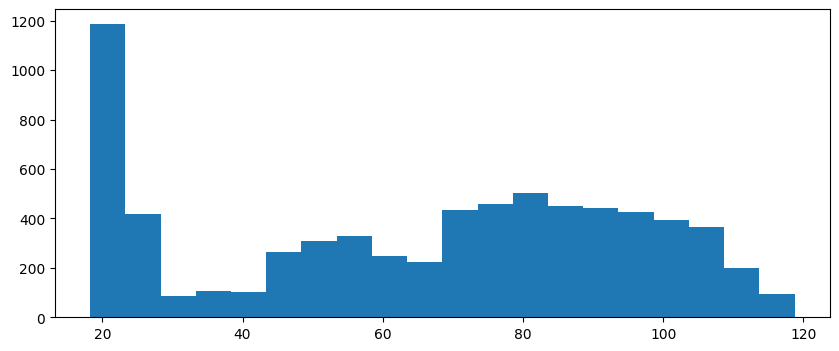

In [29]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.hist(data["MonthlyCharges"], bins=20)
plt.show()

It can be just noticed that many customers use cheap services of the company

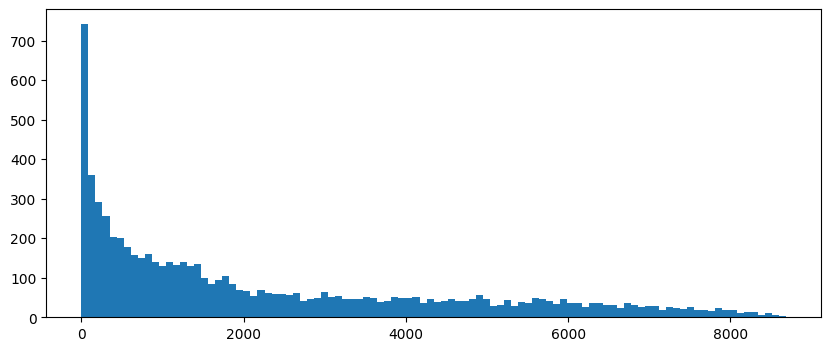

In [30]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.hist(enc_data["TotalCharges"], bins=100)
plt.show()

It's pretty natural that such a feature will be ditributed as some kind of exponential distribution. This distribution can help us to answer the question "What is the probability that our customer will spend X money on us".

<a id="non-categorical-influence"><a>

## Influence of Churn on tenure, MonthCharges and TotalCharges distribution

Just looking at a single histogram tell us almost nothing. Let's look at some pair plots of the above variables with our target variable.

### TotalCharges

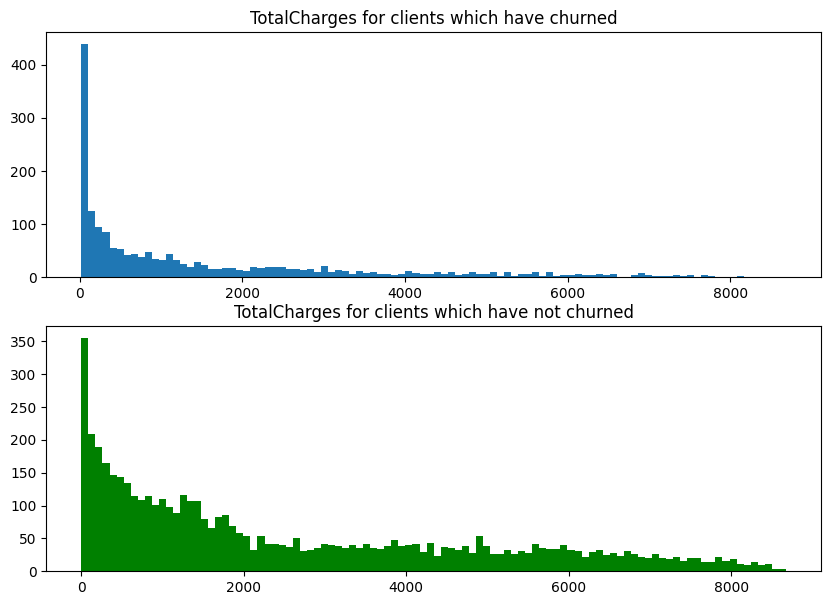

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(10,7))

total_charges_churn = enc_data["TotalCharges"][data["Churn"] == "Yes"]
total_charges_no_churn = enc_data["TotalCharges"][data["Churn"] == "No"]

ax[0].hist(total_charges_churn, bins=100)
ax[0].set_title("TotalCharges for сlients which have churned")
ax[1].hist(total_charges_no_churn, bins=100, color="green")
ax[1].set_title("TotalCharges for сlients which have not churned")
plt.show()

Wee see the same behavior in distribution for both cases. The first histogram looks much smaller with not such high columns. The reason is that there is a disbalance in our data regarding our classes.

### tenure

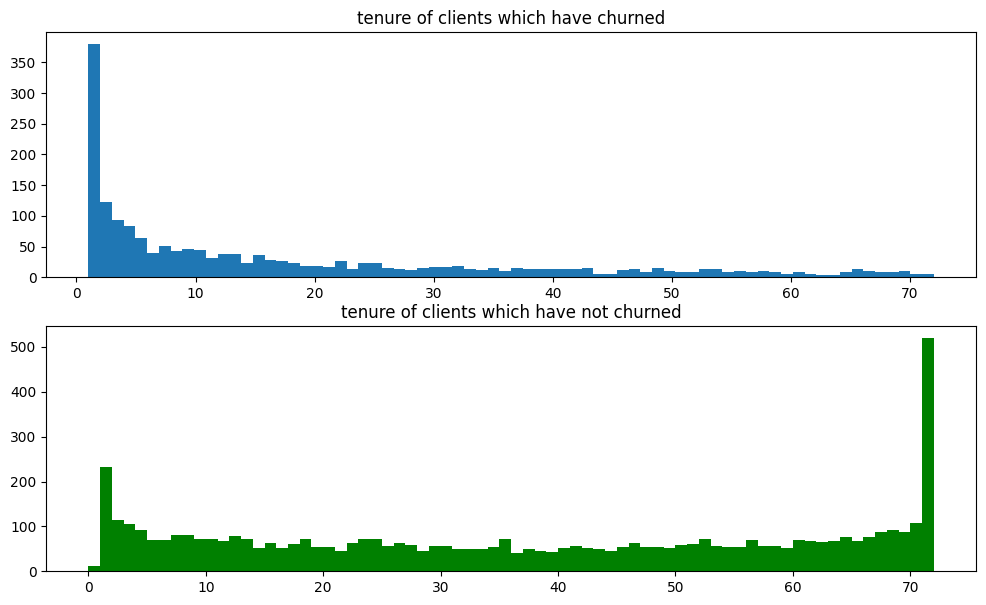

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(12,7))

tenure_churn = enc_data["tenure"][data["Churn"] == "Yes"]
tenure_no_churn = enc_data["tenure"][data["Churn"] == "No"]

ax[0].hist(tenure_churn, bins=72)
ax[0].set_title("tenure of сlients which have churned")
ax[1].hist(tenure_no_churn, bins=72, color="green")
ax[1].set_title("tenure of clients which have not churned")
plt.show()

For the clients which have churned we can see that the longer the client stays the less the probability that he will churn. But of course we need to remember that there are class disbalance in our data.

On the other hand we see that not churned clients distributet through the tenure almost uniform except side-values

### MonthlyCharges

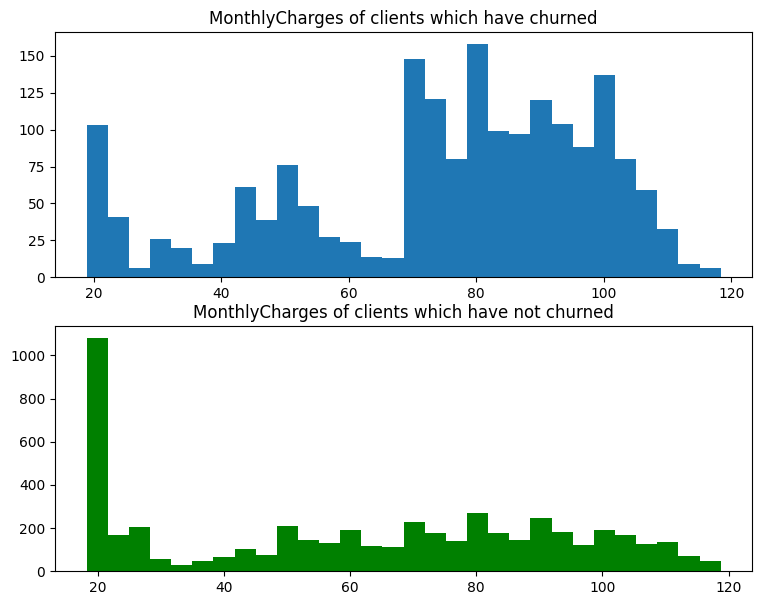

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(9,7))

monthy_charges_churn = enc_data["MonthlyCharges"][data["Churn"] == "Yes"]
monthy_charges_no_churn = enc_data["MonthlyCharges"][data["Churn"] != "Yes"]

ax[0].hist(monthy_charges_churn, bins=30)
ax[0].set_title("MonthlyCharges of сlients which have churned")
ax[1].hist(monthy_charges_no_churn, bins=30, color="green")
ax[1].set_title("MonthlyCharges of clients which have not churned")
plt.show()

<a id="total-charges-statistical-hypotesis"></a>
### Statistical hypothesis about TotalCharges

As we said we have noticed that the feature TotalCharges seems to be exponential distributed. We can try to estimate parameter $\lambda$ from exponential distribution and look how the coresponding exponential pdf fits to our histogram. Also we can perform a Kolmogorov-Smirnov test to test our exponential hypothesis

Estimated mean: 2279.7343035638223
Estimated lambda: 0.0004386476083799493


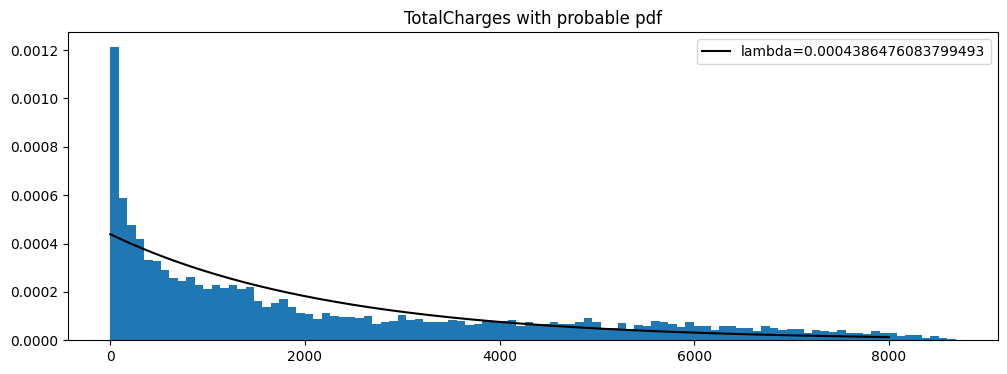

In [48]:
import scipy.stats as stats


TotalCharges_mean = enc_data["TotalCharges"].mean()

TotalCharges_lambda = 1 / TotalCharges_mean

print("Estimated mean:", TotalCharges_mean)
print("Estimated lambda:", TotalCharges_lambda)

fig, ax = plt.subplots(figsize=(12,4))

X = np.linspace(0, 8000, 300)

ax.hist(enc_data["TotalCharges"], bins=100, density=True)
ax.set_title("TotalCharges with probable pdf")
TotalCharges_expon_pdf = stats.expon.pdf(X, scale=TotalCharges_mean)
ax.plot(X, TotalCharges_expon_pdf, color="black", linewidth=1.5,
           label="lambda={}".format(TotalCharges_lambda))
ax.legend()

plt.show()

We can already see that our "probable pdf" describes or data almost truerly except the customers which have spend not so much money on us.  